In [137]:
import math
from matplotlib import pyplot as plt

In [252]:
# pid
class PID:
    def __init__(self, kp, ki, kd, dt):
        self._kp = kp
        self._ki = ki
        self._kd = kd
        self._err_history = []
        
    def output(self,err,dt):
        out = self._kp*err
        
        out += self._ki*(sum(self._err_history)+err)*dt
        
        if len(self._err_history)>0:
            out += self._kd*(err-self._err_history[-1])/dt
            
        self._err_history.append(err)
        
        return out
    
    def reset(self):
        self._err_history = []

In [253]:
# machine
class Machine:
    def __init__(self, m, x0=0, v0=0):
        self._x = x0
        self._v = v0
        self._m = m
        
    def control(self, force, dt):
        self._x += 0.5*(force/self._m)*dt*dt + self._v*dt
        self._v += force*dt/self._m
        
    def current(self):
        return self._x, self._v

In [254]:
# control loop
def control_loop(machine, pid, target, tol, max_feedback):
    dt = 0.1

    i = 0
    xi, vi = machine.current()
    while (True):        
        xi, vi = machine.current()
        
        if abs(xi-target)<tol:# and abs(vi)<tol:
            break;
    
        err = target-xi
        feedback = pid.output(err,dt)
        
        # clip
        if feedback>max_feedback:
            feedback = max_feedback
        
        if feedback<-max_feedback:
            feedback = -max_feedback
    
        machine.control(feedback,dt)
        
        if (i==100):
            break
            
        i+=1

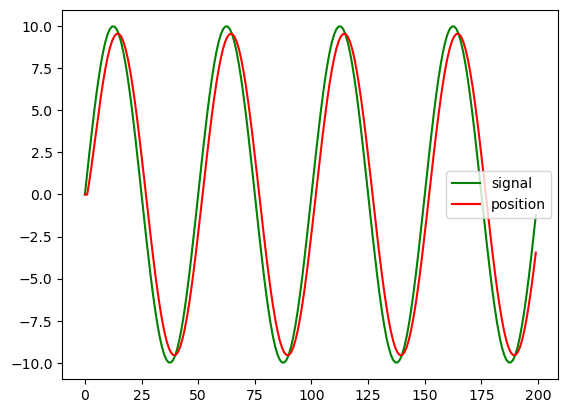

In [260]:
def signal(t):
    return 10*math.sin(2*math.pi*t/50)
    return 10*t/100
    return 10

machine = Machine(1,0,-1)
max_force = 1

pid = PID(0.1,0.05,10,dt)

t = []
x = []
s = []

dt = 1
for i in range(200):
    t.append(dt*i)
    s.append(signal(dt*i))
    
    control_loop(machine, pid, s[-1], 0.1, max_force)
    pid.reset()
    
    xi, vi = machine.current()
    x.append(xi)
    
plt.plot(t, s, 'g', label='signal')
plt.plot(t, x, 'r', label='position')
plt.legend()
plt.show()